In [176]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
%matplotlib inline
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
class Collector:
    def __init__(self, path="/Users/stan/Desktop/Chrono_data"):
        if path is None:
            path = os.curdir
        all_data = []
        for d in os.listdir(path):
            # range(brands)
            if 'Chrono' != d[:6]:
                continue
            os.chdir(path+"/"+d)
            df = []
            try:
                df = self.get_df(path+"/"+d)
                all_data.append(df)
            except Exception, e:
                print e
                os.chdir(path)
            os.chdir(path)
        self.data = pd.concat([_ for _ in all_data])
    def get_df(self, path):
        print path
        allf = os.listdir(path)
        return pd.concat([pd.read_csv(path + "/" + _, sep=";") for _ in allf])

In [76]:
serj_path = "/Users/istar/Documents/d2u/parsers/Chrono24/analysys/watches_eu.csv"


In [77]:
df = pd.read_csv(serj_path, sep=";")

/Users/istar/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,6,30,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1. удалим строки с None в полях {Price, ref}

2. price on request ---> -1

In [170]:
test_data = df
test_data = test_data.replace("price on request", np.NaN)
test_data = test_data.replace("None", np.NaN)
test_data = test_data.dropna(subset=["Ref. No.", "EURO price"], how="any")
test_data["EURO price"] = test_data["EURO price"].astype("int64")


In [171]:
test_data.shape

(257835, 42)

In [155]:
counter = dict()
year_and_price = dict()
# this dict will count objs by brand+refNumber

In [156]:
for ind, raw in tqdm(test_data.iterrows()):
    dict_id, price, year = raw["Brand"] +"__"+ raw["Ref. No."], raw["EURO price"], raw["Year"]
    if dict_id in counter:
        counter[dict_id] += 1
        year_and_price[dict_id].append((year, price))
    else:
        counter[dict_id] = 1
        year_and_price[dict_id] = [(year, price)]

8562it [00:01, 4577.67it/s]


In [157]:
sorted_dict = sorted(counter.items(), key=lambda x: x[1], reverse=True)

In [387]:
for raw, d in test_data.head(5).iterrows():
    print raw
test_data.head(5)

0
1
4
5
6


,Unnamed: 0,Availability,Base Caliber,Bracelet color,Bracelet length,Bracelet material,Bracelet thickness,Brand,Buckle width,Case diameter,...,Waterproof,Year,_Description_,_Functions_and_other,EURO price,merchantId,originalPath,uuid,watchId,watchName
0,0,Available now,NaN,Orange,NaN,Rubber,NaN,Adidas,NaN,NaN,...,NaN,NaN,NaN,NaN,28,NaN,/adidas/reloj-adidas-original--id5656046.htm,45008aa8-1ed1-4e42-8bce-5f01e2278bd4,5656046.0,Adidas RELOJ ADIDAS ORIGINAL
1,1,Available now,NaN,NaN,NaN,Leather,NaN,Adidas,NaN,NaN,...,NaN,NaN,NaN,NaN,5048,1.0,/adidas/test-inserat--id2903250.htm,5470965a-31d1-43ed-9ceb-a40eff7a3400,2903250.0,Adidas Test-Inserat
4,4,Available now,NaN,Steel,NaN,Steel,NaN,Aigner,NaN,41 x 32 mm,...,3 ATM,2017,NaN,"Date; Center Seconds, Only Original Parts",251,3292.0,/aigner/salerno-herrenuhr-edelstahl-zb-schwarz...,ac6630f9-4689-42f2-82c2-9185deda9aaf,2989086.0,Aigner Salerno Herrenuhr Edelstahl ZB schwarz
5,5,Available now,NaN,Black,NaN,Leather,NaN,Aigner,NaN,44 x 38 mm,...,NaN,NaN,Very good condition \rOriginal box & open docu...,NaN,1010,2398.0,/aigner/etienne-led---aigner---ref-6038---boxp...,0d69538e-d194-4a6e-834f-6925bf27e1d8,4580023.0,Aigner Etienne LED - Aigner - Ref.: 6038 - Box...
6,6,Available now,ETA,Black,NaN,Leather,NaN,Aigner,NaN,34 x 40 mm,...,3 ATM,2017,NaN,"Date; Center Seconds, Luminescent Hands",249,3292.0,/aigner/chronograph-herrenuhr-armbanduhr-san-r...,21557e70-1df8-4a08-bfc5-857e0325ff8b,2003711.0,Aigner Chronograph Herrenuhr Armbanduhr San Remo


In [400]:
def top(df, price_from, price_to, n=150):
    # takes df
    # have made a point of getting price as int (numeric type)
    
    # crop
    df = df.dropna(subset=["EURO price"])
    df.loc[:,"Year"] = df.loc[:,"Year"].map(year_standart)
    df = df.dropna(subset=["Year", "Ref. No.", "EURO price"], how="any")
    df = df.dropna(subset=["Brand"])
    df = df.dropna(subset=["Ref. No."])
    df = df[df["EURO price"] > price_from]
    df = df[df["EURO price"] <= price_to]
    
    counter = dict()
    for ind, raw in tqdm(df.iterrows()):
        dict_id = raw["Brand"] +"__"+ raw["Ref. No."]
        if dict_id in counter:
            counter[dict_id] += 1
        else:
            counter[dict_id] = 1
    sorted_dict = sorted(counter.items(), key=lambda x: x[1], reverse=True)
    tp = map(lambda x: x[0], sorted_dict[:n])
    return tp
    

def save(items, fname):
    dct = dict()
    dct["brand_with_ref_no"] = []
    dct["count"] = []
    for item in items:
        dct["brand_with_ref_no"].append(item[0])
        dct["count"].append(item[1])
    df = pd.DataFrame(data=dct)
    df.to_csv("/Users/istar/Documents/d2u/parsers/Chrono24/analysys/"+fname+".csv", sep=";")

In [368]:
INF = 10000000000
beg_end = [(2500, 5000), (5000, 15000), (15000, 25000), (25000, INF)]

In [174]:
for beg, end in beg_end:
    out = top(test_data, beg, end)
    save(out, str(beg)+"_"+str(end))

52710it [00:08, 6265.41it/s]
92569it [00:14, 6481.63it/s]
28122it [00:04, 6292.48it/s]
21048it [00:03, 6069.72it/s]


In [198]:
df["Year"]

0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                         2017
5                         70er
6                         2017
7                         2017
8                         2017
9                         2017
10                        2017
11                        2017
12                        None
13                        1999
14                        None
15                   1984-1999
16                        None
17        Circa 1990'/Complete
18                        None
19                        None
20                        None
21                        None
22                        None
23                        1992
24                2000-present
25                        None
26                        None
27                        None
28                        1995
29                        None
                  ...         
312039                    None
312040  

In [201]:
"123".isdigit()

True

In [273]:
def year_standart(x):
    if x is np.NaN:
        return x
    if x.isdigit():
        return x
    else:
        return np.NaN

def graph_by_ref_no(df, brand, ref_no):
    year = []
    price = []
    df = df[df["Brand"] == brand]
    df = df[df["Ref. No."] == ref_no]
    df.loc[:,"Year"] = df.loc[:,"Year"].map(year_standart)
    df = df.dropna(subset=["Year"], how="any")
    df.loc[:,"Year"] = df.loc[:,"Year"].astype("int64")
    for ind, raw in tqdm(df.iterrows()):
        y, p = raw["Year"], raw["EURO price"]
        year.append(y)
        price.append(p)
    dt = pd.DataFrame({"year":year, "price":price})
    plt.plot(dt["year"], dt["price"])
    plt.xlabel("year")
    plt.ylabel("price")

In [276]:

b, r = "Omega", "311.30.42.30.01.005"

0it [00:00, ?it/s]


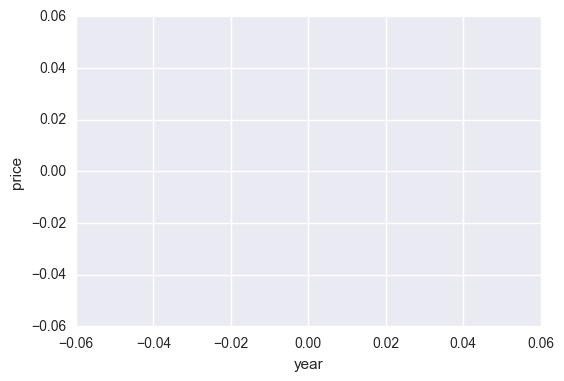

In [277]:
graph_by_ref_no(test_data, b, r)

In [284]:
td = test_data[test_data["Brand"]=="Rolex"]
td[td["Ref. No."]=="16013"]

,Unnamed: 0,Availability,Base Caliber,Bracelet color,Bracelet length,Bracelet material,Bracelet thickness,Brand,Buckle width,Case diameter,...,Waterproof,Year,_Description_,_Functions_and_other,EURO price,merchantId,originalPath,uuid,watchId,watchName
206820,206820,Available now,NaN,Gold/Steel,NaN,Gold/Steel,NaN,Rolex,NaN,36 mm,...,NaN,1981,Datejust 36mm Two Tone Jubilee bracelet Fluted...,NaN,3337,8505.0,/rolex/datejust-36mm-two-tone-jubilee-fluted-b...,f9603a27-6ac9-455f-bdb0-80d455f7bae7,4908554.0,Rolex Datejust 36mm Two Tone Jubilee Fluted Bl...
206829,206829,Available now,NaN,Gold/Steel,NaN,Gold/Steel,NaN,Rolex,NaN,36 mm,...,NaN,1986,Rolex Datejust 36mm 18K/ Stainless Steel Blue...,Date,4449,8505.0,/rolex/datejust-36mm-two-tone-blue-vignette-di...,724c3b5d-fea6-47f8-b31f-0f414edc3542,5670473.0,Rolex Datejust 36mm Two Tone Blue Vignette Dia...
206852,206852,Available now,NaN,Gold/Steel,NaN,Gold/Steel,NaN,Rolex,NaN,36 mm,...,NaN,1981,Datejust 36mm Two Tone Jubilee bracelet Fluted...,NaN,3337,8505.0,/rolex/datejust-36mm-two-tone-jubilee-fluted-b...,2fe8a54f-ca18-4974-827a-3e203c1007e7,4908554.0,Rolex Datejust 36mm Two Tone Jubilee Fluted Bl...
206861,206861,Available now,NaN,Gold/Steel,NaN,Gold/Steel,NaN,Rolex,NaN,36 mm,...,NaN,1986,Rolex Datejust 36mm 18K/ Stainless Steel Blue...,Date,4449,8505.0,/rolex/datejust-36mm-two-tone-blue-vignette-di...,4ea16f9b-8abf-460e-a9b0-b8a7647cc3b1,5670473.0,Rolex Datejust 36mm Two Tone Blue Vignette Dia...
206884,206884,Available now,NaN,Gold/Steel,NaN,Gold/Steel,NaN,Rolex,NaN,36 mm,...,NaN,1981,Datejust 36mm Two Tone Jubilee bracelet Fluted...,NaN,3337,8505.0,/rolex/datejust-36mm-two-tone-jubilee-fluted-b...,0d18a549-3d98-459e-b396-903be393bc8f,4908554.0,Rolex Datejust 36mm Two Tone Jubilee Fluted Bl...
206893,206893,Available now,NaN,Gold/Steel,NaN,Gold/Steel,NaN,Rolex,NaN,36 mm,...,NaN,1986,Rolex Datejust 36mm 18K/ Stainless Steel Blue...,Date,4449,8505.0,/rolex/datejust-36mm-two-tone-blue-vignette-di...,1c9e2985-1fd9-4dee-95fa-066c8b3ad671,5670473.0,Rolex Datejust 36mm Two Tone Blue Vignette Dia...
206916,206916,Available now,NaN,Gold/Steel,NaN,Gold/Steel,NaN,Rolex,NaN,36 mm,...,NaN,1981,Datejust 36mm Two Tone Jubilee bracelet Fluted...,NaN,3337,8505.0,/rolex/datejust-36mm-two-tone-jubilee-fluted-b...,8c30f07e-83d0-481a-89f2-f5d85acdc015,4908554.0,Rolex Datejust 36mm Two Tone Jubilee Fluted Bl...
206925,206925,Available now,NaN,Gold/Steel,NaN,Gold/Steel,NaN,Rolex,NaN,36 mm,...,NaN,1986,Rolex Datejust 36mm 18K/ Stainless Steel Blue...,Date,4449,8505.0,/rolex/datejust-36mm-two-tone-blue-vignette-di...,cd729174-58c4-495a-9b25-76a4550c4c5a,5670473.0,Rolex Datejust 36mm Two Tone Blue Vignette Dia...
206948,206948,Available now,NaN,Gold/Steel,NaN,Gold/Steel,NaN,Rolex,NaN,36 mm,...,NaN,1981,Datejust 36mm Two Tone Jubilee bracelet Fluted...,NaN,3337,8505.0,/rolex/datejust-36mm-two-tone-jubilee-fluted-b...,1667dad8-1f11-4838-b729-d01a40a60d7c,4908554.0,Rolex Datejust 36mm Two Tone Jubilee Fluted Bl...
206957,206957,Available now,NaN,Gold/Steel,NaN,Gold/Steel,NaN,Rolex,NaN,36 mm,...,NaN,1986,Rolex Datejust 36mm 18K/ Stainless Steel Blue...,Date,4449,8505.0,/rolex/datejust-36mm-two-tone-blue-vignette-di...,4373ab51-ad17-47a2-b1db-43f1767eb216,5670473.0,Rolex Datejust 36mm Two Tone Blue Vignette Dia...


In [401]:
test_data_500 = top(test_data, 0, 100000000, n=500)

102829it [00:17, 5869.76it/s]


In [402]:
test_data_500

['Rolex__16013',
 'Rolex__18238',
 'Rolex__116400GV',
 'Rolex__16030',
 'Rolex__16523',
 'Rolex__1002',
 'Rolex__16610',
 'Rolex__115210',
 'Rolex__16700',
 'Rolex__116518',
 'Rolex__116200',
 'Rolex__116334',
 'Rolex__116264 Turn-O-Graph RTOG-W1699D8',
 'Rolex__218235',
 'Rolex__116523',
 'Breitling__A23322',
 'Rolex__114060',
 'Rolex__326938',
 'Rolex__326935',
 'Rolex__116613',
 'Rolex__228235',
 'Omega__231.10.42.21.01.002',
 'Omega__Rose Gold',
 'Omega__2,31103E+13',
 'Omega__3851.50.11',
 'Omega__3684076',
 'Omega__231.10.44.52.06.001',
 'Omega__2232.30.00',
 'Omega__145.022',
 'Omega__311.33.40.30.02.001',
 'Omega__231.13.44.50.06.001',
 'Omega__231.20.42.21.06.003',
 'Omega__422.18.35.50.10.001',
 'IWC__IW371445',
 'Breitling__AB012012/BB01/436X',
 'Breitling__A17364',
 'Breitling__C1335653',
 'Breitling__E76325A5/O508-159E',
 'Breitling__A13341',
 'Breitling__1240897',
 'Breitling__C13356',
 'Cartier__2510',
 'Cartier__WSNM0006',
 'Cartier__CRW25032P5',
 'Cartier__W7100009',
 

In [319]:
np.min(test_data["Year"].dropna())


'1860'

In [403]:

counter = dict()
df = test_data
df.loc[:,"Year"] = df.loc[:,"Year"].map(year_standart)
df = df.dropna(subset=["Year", "Ref. No.", "EURO price"], how="any")
df.loc[:,"Year"] = df.loc[:,"Year"].astype("int64")
for br in test_data_500:
    df_ = df[df["Brand"] +"__"+ df["Ref. No."] == br]
    for ind, raw in tqdm(df_.iterrows()):
            dict_id, y, p = raw["Brand"] +"__"+ raw["Ref. No."], raw["Year"], raw["EURO price"]
            if not dict_id in counter:
                counter[dict_id] = dict()
            if not p in counter[dict_id]:
                counter[dict_id][p] = []
            counter[dict_id][p].append(y)

4070it [00:00, 5010.05it/s]
4070it [00:00, 4396.15it/s]
2035it [00:00, 5028.65it/s]
2035it [00:00, 3873.42it/s]
2035it [00:00, 4339.60it/s]
2035it [00:00, 4530.09it/s]
2035it [00:00, 5503.08it/s]
2035it [00:00, 5190.69it/s]
2035it [00:00, 3644.97it/s]
2035it [00:00, 5222.74it/s]
2035it [00:00, 4960.96it/s]
2035it [00:00, 5085.29it/s]
2035it [00:00, 5050.47it/s]
2035it [00:00, 5426.74it/s]
2035it [00:00, 4967.32it/s]
1054it [00:00, 4704.50it/s]
763it [00:00, 5287.49it/s]
684it [00:00, 4797.34it/s]
678it [00:00, 3618.39it/s]
673it [00:00, 2457.48it/s]
673it [00:00, 4155.25it/s]
656it [00:00, 4317.52it/s]
656it [00:00, 4716.88it/s]
656it [00:00, 4543.15it/s]
656it [00:00, 4711.43it/s]
656it [00:00, 5316.48it/s]
656it [00:00, 5035.54it/s]
656it [00:00, 5017.51it/s]
656it [00:00, 3056.88it/s]
656it [00:00, 3051.19it/s]
656it [00:00, 2987.37it/s]
656it [00:00, 3358.80it/s]
656it [00:00, 2748.52it/s]
610it [00:00, 3905.90it/s]
527it [00:00, 3882.93it/s]
527it [00:00, 4414.25it/s]
527it [00:00

{'Audemars Piguet__10667': {3114: [1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   1957,
   19

In [404]:
table = dict()
year_from = 1860
year_to = 2017
table["model"] = []
ind = 0
for i in range(year_from, year_to + 1):
    table[i] = []
for model in counter:
    for price in counter[model]:
        years = set(counter[model][price])
        for y in years:
            if not int(y) in table:
                continue
            if len(table[int(y)]) > ind:
                table[int(y)][-1] += ", " + str(price)
            else:
                table[int(y)].append(str(price))
        for y in range(year_from, year_to + 1):
            if len(table[y]) == ind:
                table[y].append("None")
    table["model"].append(model)
    ind += 1
print ind

500


In [405]:
out = pd.DataFrame(table)
out.to_csv("./to_stas.csv", sep=";")

In [312]:
counter

{'Stowa__FL 23883': {9896: [1944], 11512: [1944], 15854: [1943]},
 'Oris__01 735 7641 4263-07 5 22 22G': {885: [2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,
   2016,


In [303]:
d = dict()
for br in d_counter:
    items = sorted(d_counter[br].items(), key=lambda x: x[0])
    for i in range(len(items)):
        for j in range(len(items)):
            for y1 in items[i][1]:
                for y2 in items[j][1]:
                    if y1 > y2:
                        if not br in d:
                            d[br] = []
                            d[br].append((items[i][0], items[j][0], y1, y2))
    

In [304]:
d

{'Anonimo__2007': [(2716, 3514, 2013, 2007)],
 'Bomberg__BS45GMTTT.006.3': [(681, 927, 2016, 2015)],
 'Breitling__A23322': [(4269, 3466, 2012, 2000)],
 'Cvstos__CGPBST': [(7624, 5162, 2013, 2012)],
 'De Grisogono__UNO/DF': [(17711, 2981, 2016, 2012)],
 'Dietrich__OT-1': [(863, 1350, 2016, 2015)],
 'Dietrich__OT-3': [(1051, 979, 2017, 2015)],
 'H.Moser & Cie.__343.505': [(9391, 11481, 2011, 2008)],
 'Jorg Hysek__ANP06-26/50': [(11310, 21206, 2012, 2010)],
 'Junghans__027/4120.00': [(1444, 1210, 2017, 2012)],
 'Laco__861704': [(1504, 1210, 2017, 2016)],
 'Laco__FL 23883': [(787, 5726, 2010, 1943)],
 'Louis Moinet__LM-24.30.56': [(10680, 9879, 2016, 2015)],
 'Martin Braun__42/S': [(2492, 3786, 2009, 2004)],
 'Meistersinger__AM907': [(1363, 1262, 2017, 2016)],
 'Michel Jordi__MT.5500.07.00': [(5455, 5446, 2016, 2007)],
 'Nivrel__N 531.001': [(2120, 3484, 2016, 2013)],
 'Nomos__823': [(2514, 1817, 2013, 2012)],
 'Orfina__7177': [(4948, 1605, 1983, 1977)],
 'Pequignet__4121318': [(1262, 1009

In [292]:
import json

In [295]:
!ls

15000_25000.csv       5000_15000.csv        watches.csv
25000_10000000000.csv Archive.zip           watches_eu.csv
2500_5000.csv         chrono_analysys.ipynb


In [298]:
with open("y_p.json", "w") as f:
    f.write(json.dumps(d_counter, ensure_ascii=False))